
Dataset Head:
   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

Mean Vector:
Sepal_Length    5.843333
Sepal_Width     3.057333
Petal_Length    3.758000
Petal_Width     1.199333
dtype: float64

Covariance Matrix:
              Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
Sepal_Length      0.685694    -0.042434      1.274315     0.516271
Sepal_Width      -0.042434     0.189979     -0.329656    -0.121639
Petal_Length      1.274315    -0.329656      3.116278     1.295609
Petal_Width       0.516271    -0.121639      1.295609     0.581006

Correlation Matrix:
              Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
Sepal_Length      1.000

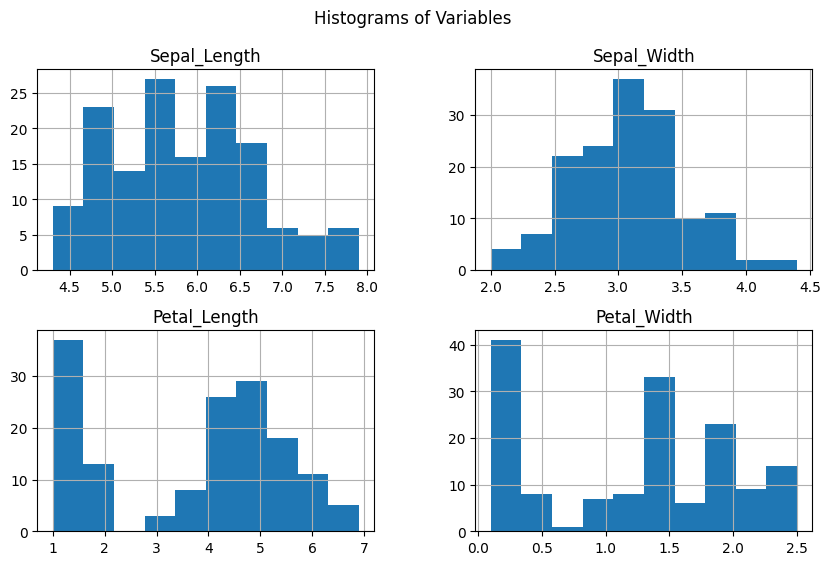

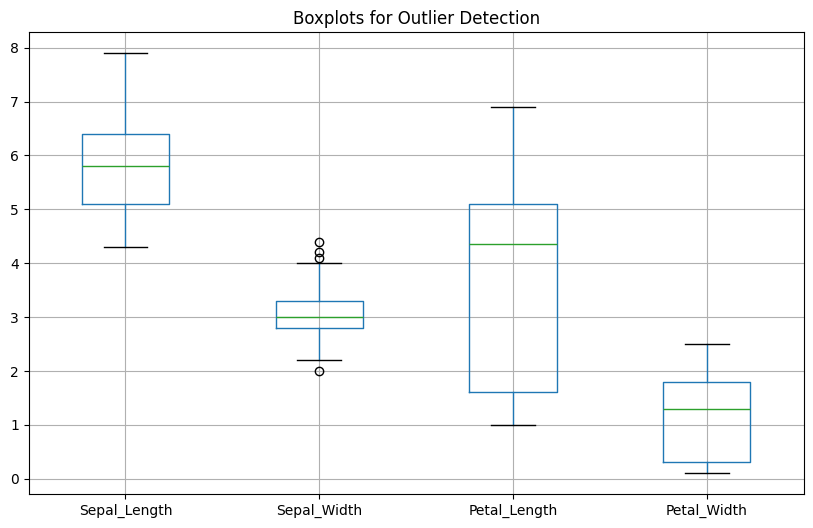

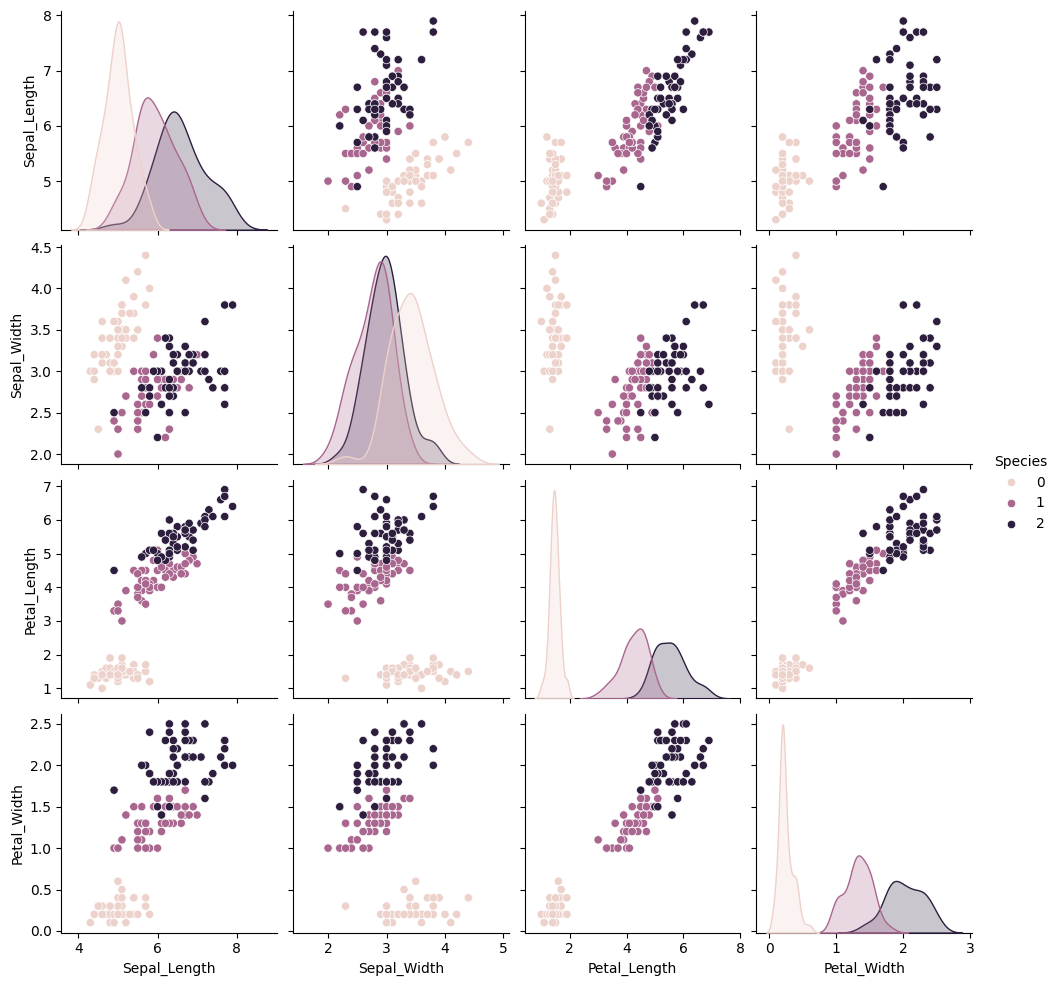


Canonical Correlation Coefficient: 0.9409689969606329

Missing Values Count:
Sepal_Length    10
Sepal_Width      0
Petal_Length     0
Petal_Width      0
Species          0
dtype: int64

Number of Multivariate Outliers: 0

Shapiro-Wilk Normality Test Results:
Sepal_Length: p-value = 0.010181161454691156
Sepal_Width: p-value = 0.10115426916130282
Petal_Length: p-value = 7.412263135173186e-10
Petal_Width: p-value = 1.680465210314913e-08


In [ ]:
# =========================================
# Activity 1: Multivariate Data Analysis
# Complete Python Code
# =========================================

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.cross_decomposition import CCA
from scipy.stats import chi2, shapiro

# -----------------------------------------
# 1. Import Multivariate Dataset
# -----------------------------------------

iris = load_iris()
df = pd.DataFrame(iris.data, columns=[
    'Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'
])
df['Species'] = iris.target

print("\nDataset Head:")
print(df.head())

# -----------------------------------------
# 2. Mean Vector
# -----------------------------------------

mean_vector = df.iloc[:, :4].mean()
print("\nMean Vector:")
print(mean_vector)

# -----------------------------------------
# 3. Covariance Matrix
# -----------------------------------------

cov_matrix = df.iloc[:, :4].cov()
print("\nCovariance Matrix:")
print(cov_matrix)

# -----------------------------------------
# 4. Correlation Matrix
# -----------------------------------------

corr_matrix = df.iloc[:, :4].corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

# -----------------------------------------
# 5. Graphical Visualizations
# -----------------------------------------

# Histograms
df.iloc[:, :4].hist(figsize=(10, 6))
plt.suptitle("Histograms of Variables")
plt.show()

# Boxplots
df.iloc[:, :4].boxplot(figsize=(10, 6))
plt.title("Boxplots for Outlier Detection")
plt.show()

# -----------------------------------------
# 6. Matrix Scatter Plot
# -----------------------------------------

sns.pairplot(df, hue="Species")
plt.show()

# -----------------------------------------
# 7. Canonical Correlation Analysis (CCA)
# -----------------------------------------

# Define two variable sets
X = df[['Sepal_Length', 'Sepal_Width']]
Y = df[['Petal_Length', 'Petal_Width']]

cca = CCA(n_components=1)
cca.fit(X, Y)

X_c, Y_c = cca.transform(X, Y)

corr_cca = np.corrcoef(X_c.T, Y_c.T)[0, 1]
print("\nCanonical Correlation Coefficient:", corr_cca)

# -----------------------------------------
# 8. Handling Missing Data
# -----------------------------------------

# Introduce missing values artificially
df_missing = df.copy()
df_missing.iloc[0:10, 0] = np.nan

print("\nMissing Values Count:")
print(df_missing.isnull().sum())

# Method 1: Mean Imputation
df_mean_imputed = df_missing.fillna(df_missing.mean(numeric_only=True))

# Method 2: Row Deletion
df_row_deleted = df_missing.dropna()

# -----------------------------------------
# 9. Multivariate Outlier Detection
# -----------------------------------------

X_values = df.iloc[:, :4]
mean_vec = X_values.mean()
cov_mat = X_values.cov()
inv_cov_mat = np.linalg.inv(cov_mat)

mahalanobis_dist = []

for i in range(len(X_values)):
    diff = X_values.iloc[i] - mean_vec
    md = np.sqrt(diff.T @ inv_cov_mat @ diff)
    mahalanobis_dist.append(md)

df['Mahalanobis_Distance'] = mahalanobis_dist

# Threshold using Chi-square distribution
threshold = chi2.ppf(0.975, df=4)

outliers = df[df['Mahalanobis_Distance'] > threshold]

print("\nNumber of Multivariate Outliers:", len(outliers))

# -----------------------------------------
# 10. Assumption Testing
# -----------------------------------------

# Univariate Normality Test (Shapiro-Wilk)
print("\nShapiro-Wilk Normality Test Results:")
for col in df.columns[:4]:
    stat, p = shapiro(df[col])
    print(f"{col}: p-value = {p}")

# -----------------------------------------
# End of Code
# -----------------------------------------


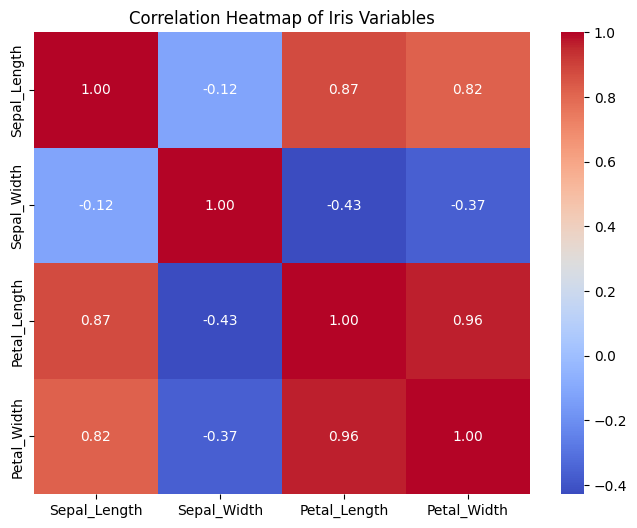

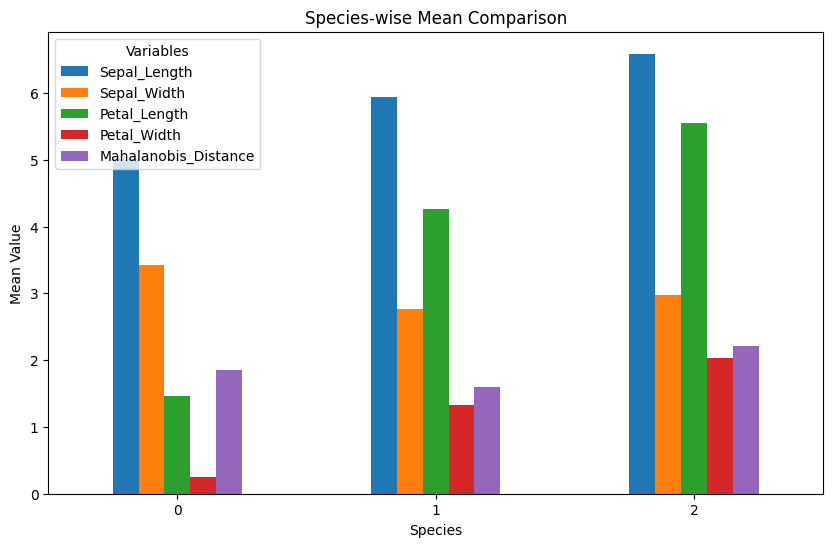

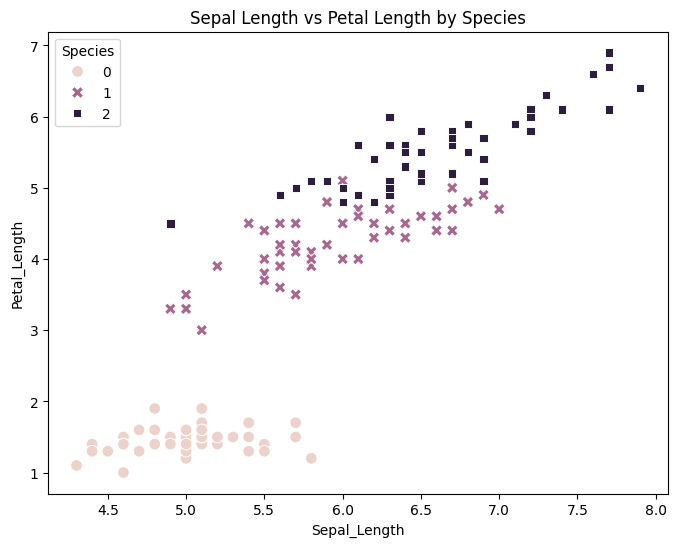

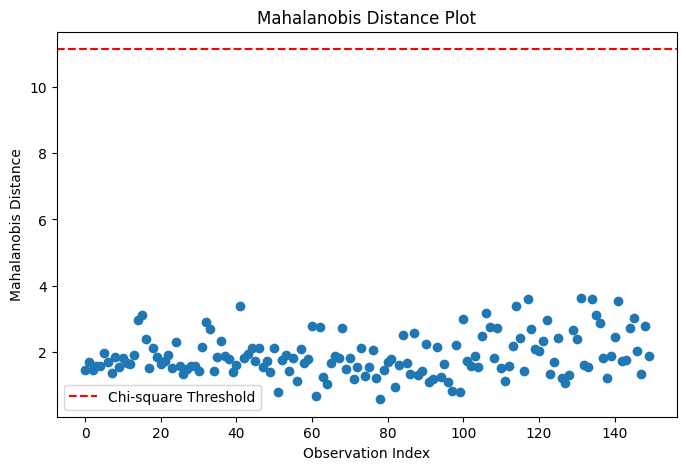

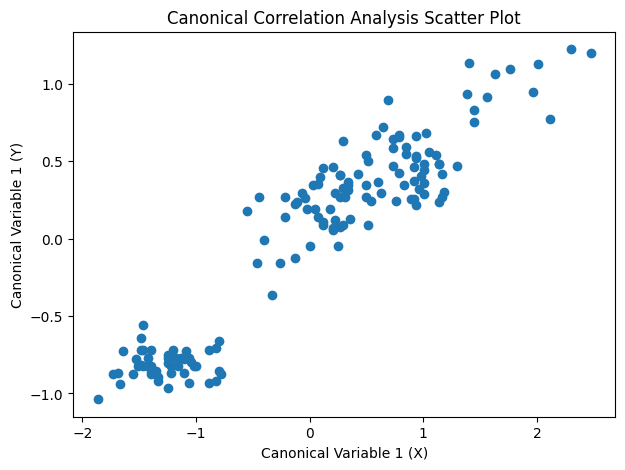

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cross_decomposition import CCA
from scipy.stats import chi2

# Re-initialize variables from the first cell to ensure they are available
iris = load_iris()
df = pd.DataFrame(iris.data, columns=[
    'Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'
])
df['Species'] = iris.target

corr_matrix = df.iloc[:, :4].corr()

# For CCA plot
X = df[['Sepal_Length', 'Sepal_Width']]
Y = df[['Petal_Length', 'Petal_Width']]
cca = CCA(n_components=1)
ccs = cca.fit(X, Y)
X_c, Y_c = cca.transform(X, Y)

# For Mahalanobis Distance plot
X_values = df.iloc[:, :4]
mean_vec = X_values.mean()
cov_mat = X_values.cov()
inv_cov_mat = np.linalg.inv(cov_mat)

mahalanobis_dist = []

for i in range(len(X_values)):
    diff = X_values.iloc[i] - mean_vec
    md = np.sqrt(diff.T @ inv_cov_mat @ diff)
    mahalanobis_dist.append(md)

df['Mahalanobis_Distance'] = mahalanobis_dist

threshold = chi2.ppf(0.975, df=4)


# -----------------------------------------
# 11. Additional Multivariate Visualizations
# -----------------------------------------

# 1. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Iris Variables")
plt.show()

# 2. Species-wise Mean Comparison (Bar Plot)
species_means = df.groupby('Species').mean()

species_means.plot(kind='bar', figsize=(10, 6))
plt.title("Species-wise Mean Comparison")
plt.xlabel("Species")
plt.ylabel("Mean Value")
plt.xticks(rotation=0)
plt.legend(title="Variables")
plt.show()

# 3. Sepal Length vs Petal Length Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="Sepal_Length",
    y="Petal_Length",
    hue="Species",
    style="Species",
    s=70
)
plt.title("Sepal Length vs Petal Length by Species")
plt.show()

# 4. Mahalanobis Distance Plot
plt.figure(figsize=(8, 5))
plt.plot(df['Mahalanobis_Distance'], marker='o', linestyle='')
plt.axhline(y=threshold, color='r', linestyle='--', label='Chi-square Threshold')
plt.title("Mahalanobis Distance Plot")
plt.xlabel("Observation Index")
plt.ylabel("Mahalanobis Distance")
plt.legend()
plt.show()

# 5. Canonical Correlation Scatter Plot
plt.figure(figsize=(7, 5))
plt.scatter(X_c, Y_c)
plt.xlabel("Canonical Variable 1 (X)")
plt.ylabel("Canonical Variable 1 (Y)")
plt.title("Canonical Correlation Analysis Scatter Plot")
plt.show()

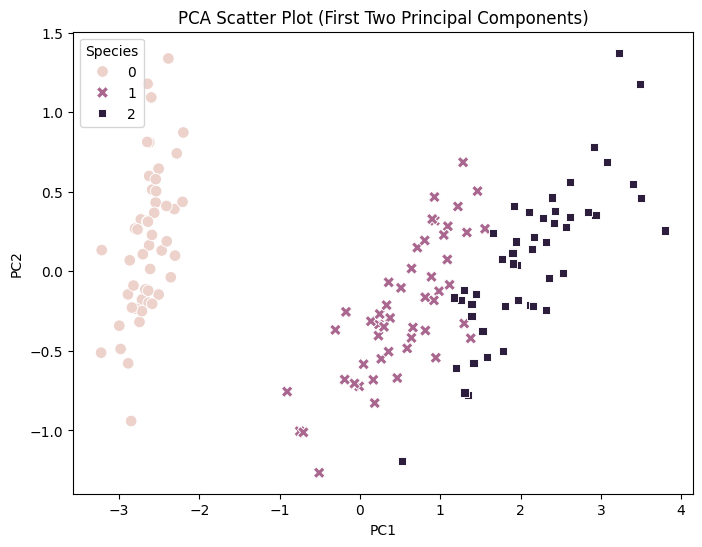

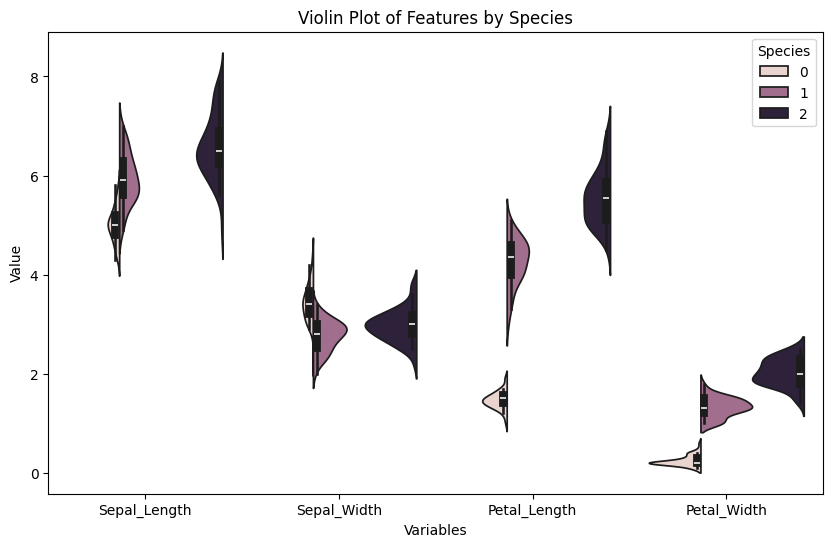

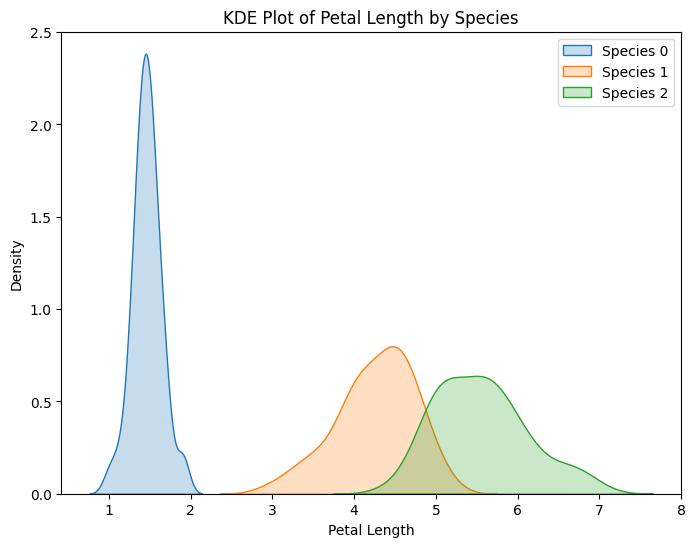

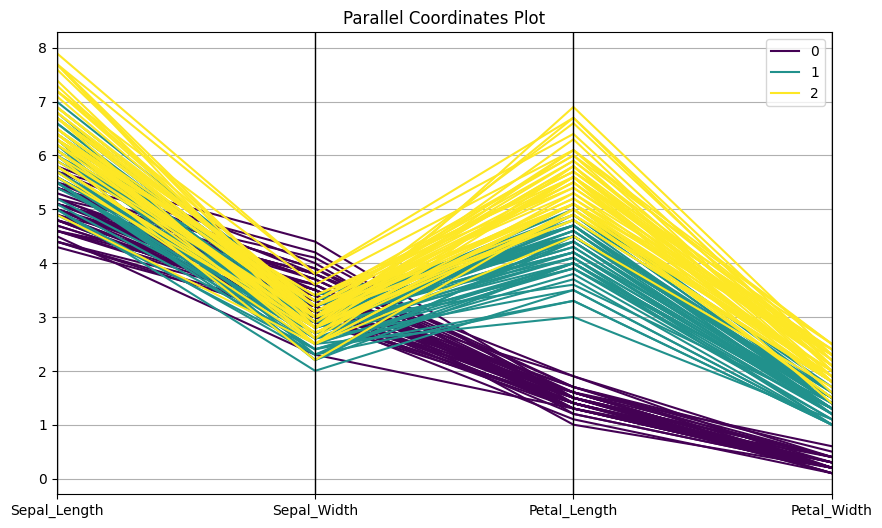

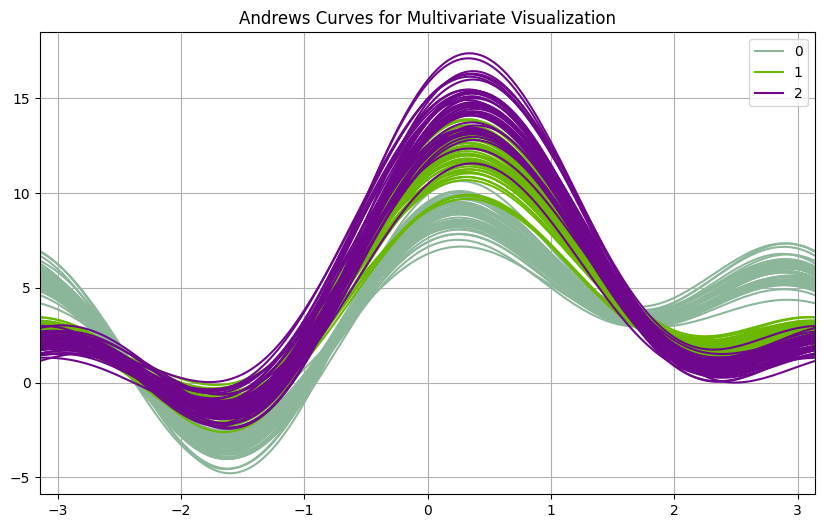

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates, andrews_curves

# Re-initialize variables to ensure they are available
iris = load_iris()
df = pd.DataFrame(iris.data, columns=[
    'Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'
])
df['Species'] = iris.target

# -----------------------------------------
# 12. More Advanced Multivariate Visualizations
# -----------------------------------------


# 1. PCA Scatter Plot (Dimensionality Reduction)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df.iloc[:, :4])

pca_df = pd.DataFrame(
    pca_components,
    columns=['PC1', 'PC2']
)
pca_df['Species'] = df['Species']

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='Species',
    style='Species',
    s=70
)
plt.title("PCA Scatter Plot (First Two Principal Components)")
plt.show()

# 2. Violin Plot (Distribution + Density)
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df.melt(id_vars='Species'),
    x='variable',
    y='value',
    hue='Species',
    split=True
)
plt.title("Violin Plot of Features by Species")
plt.xlabel("Variables")
plt.ylabel("Value")
plt.show()

# 3. Kernel Density Estimation (KDE) Plot
plt.figure(figsize=(8, 6))
for species in df['Species'].unique():
    sns.kdeplot(
        df[df['Species'] == species]['Petal_Length'],
        label=f"Species {species}",
        fill=True
    )
plt.title("KDE Plot of Petal Length by Species")
plt.xlabel("Petal Length")
plt.legend()
plt.show()

# 4. Parallel Coordinates Plot
plt.figure(figsize=(10, 6))
parallel_coordinates(
    df[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']],
    class_column='Species',
    colormap='viridis'
)
plt.title("Parallel Coordinates Plot")
plt.show()

# 5. Andrews Curves
plt.figure(figsize=(10, 6))
andrews_curves(
    df[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']],
    class_column='Species'
)
plt.title("Andrews Curves for Multivariate Visualization")
plt.show()

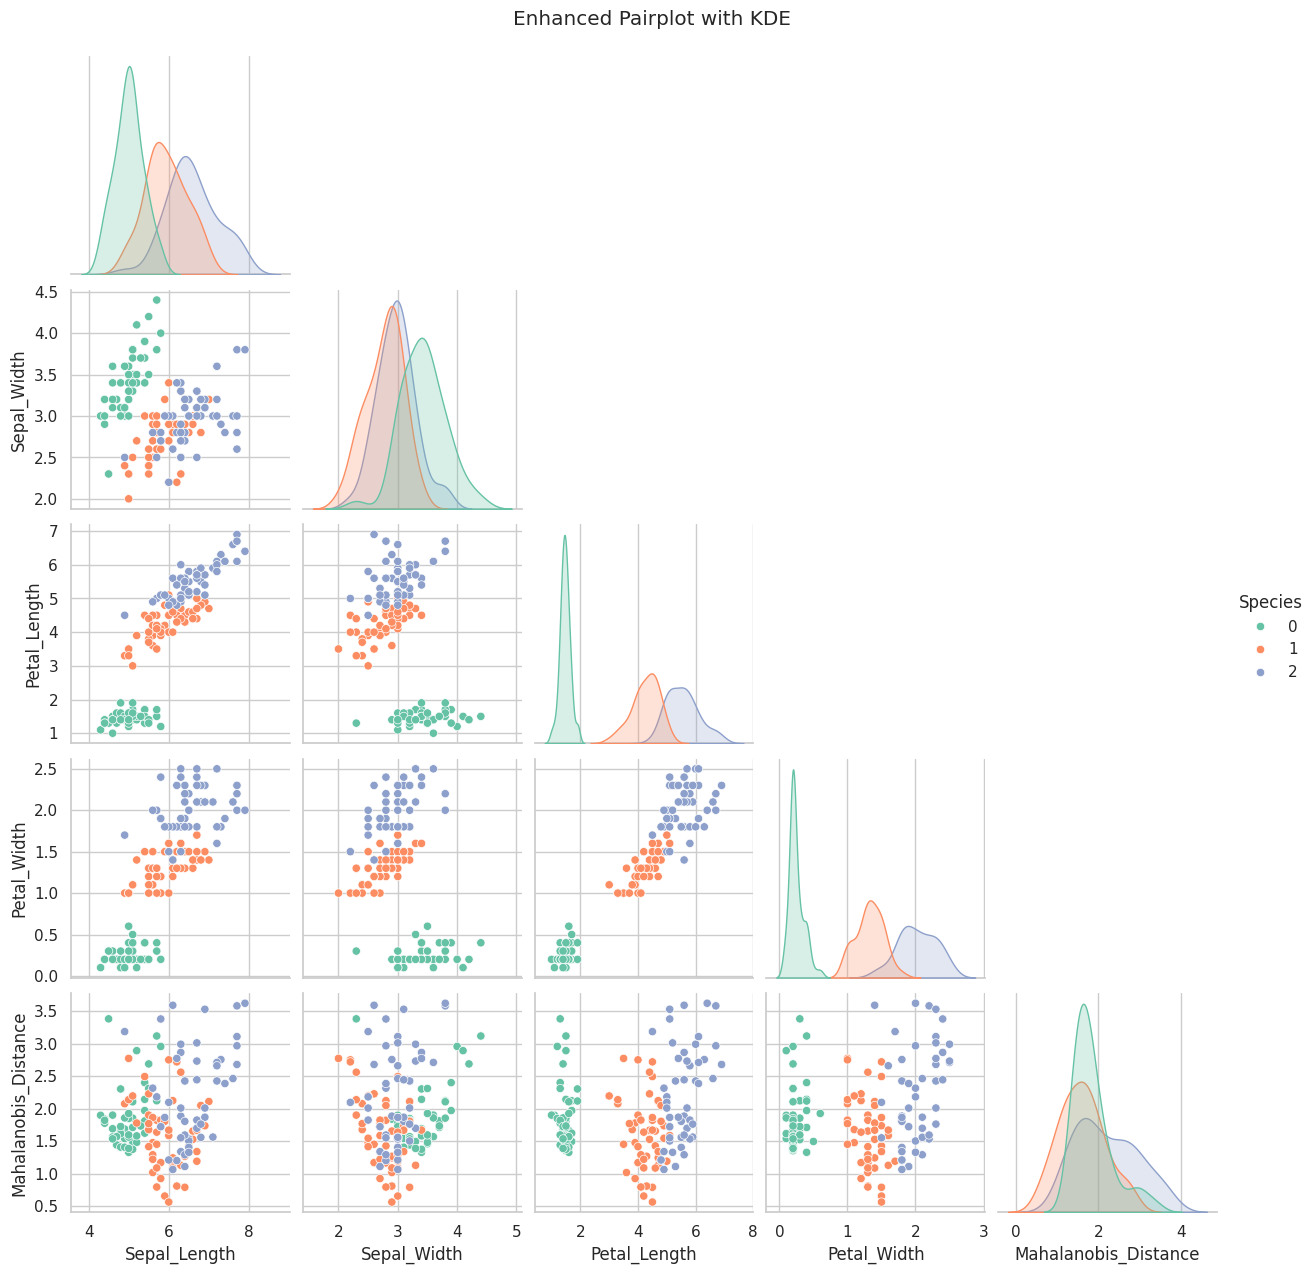

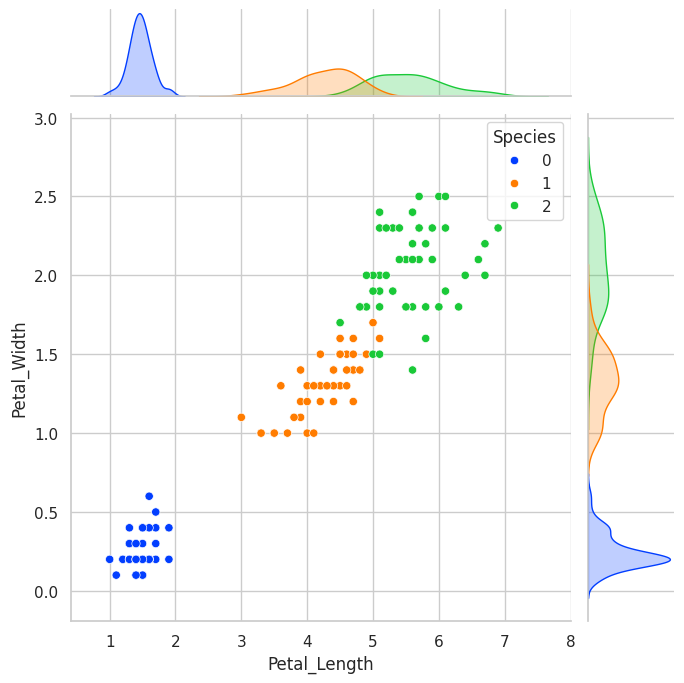

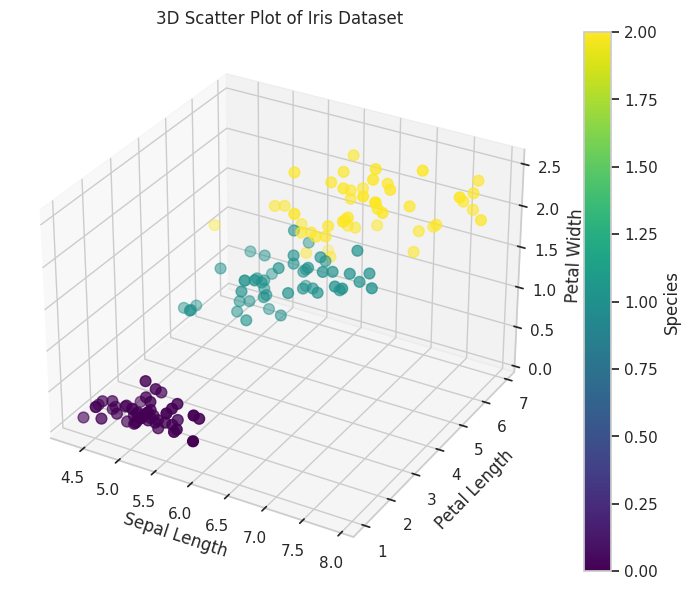

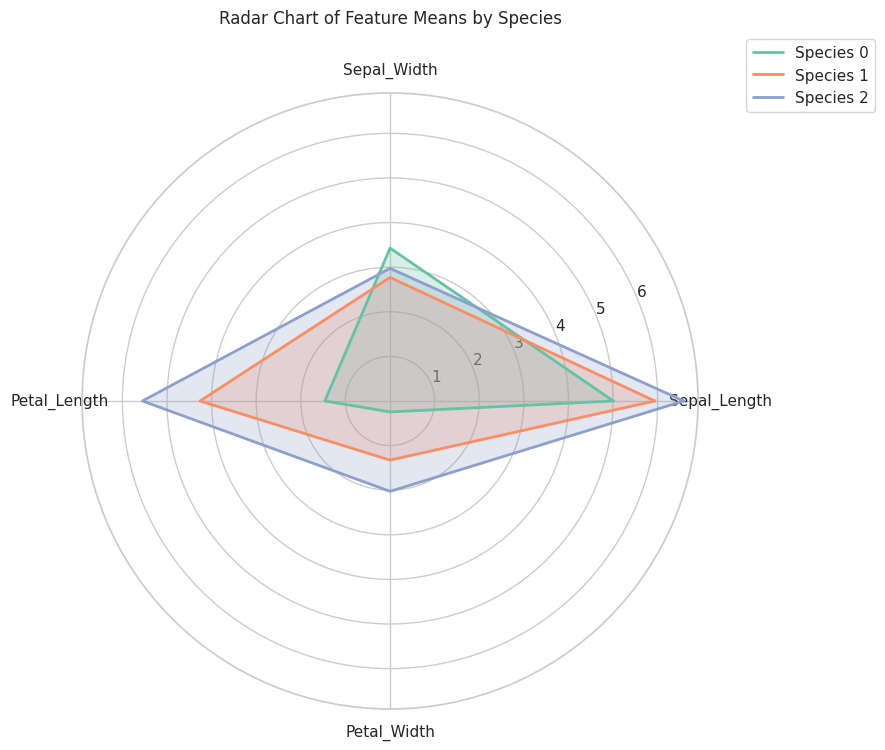

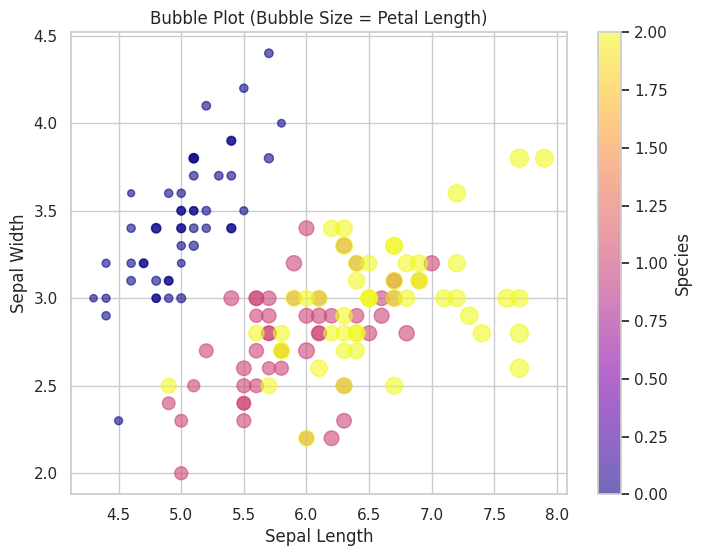

In [ ]:
# -----------------------------------------
# 13. Aesthetic & Colorful Visualizations
# -----------------------------------------

sns.set(style="whitegrid", palette="Set2")

# 1. Pairplot with KDE Diagonal (More Elegant)
sns.pairplot(
    df,
    hue="Species",
    diag_kind="kde",
    corner=True,
    palette="Set2"
)
plt.suptitle("Enhanced Pairplot with KDE", y=1.02)
plt.show()

# 2. Joint Plot (Petal Length vs Petal Width)
sns.jointplot(
    data=df,
    x="Petal_Length",
    y="Petal_Width",
    hue="Species",
    palette="bright",
    height=7
)
plt.show()

# 3. 3D Scatter Plot (Very Attractive)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['Sepal_Length'],
    df['Petal_Length'],
    df['Petal_Width'],
    c=df['Species'],
    cmap='viridis',
    s=60
)

ax.set_xlabel("Sepal Length")
ax.set_ylabel("Petal Length")
ax.set_zlabel("Petal Width")
ax.set_title("3D Scatter Plot of Iris Dataset")
plt.colorbar(scatter, label="Species")
plt.show()

# 4. Radar Chart (Spider Plot) – Class Profile Visualization
from math import pi

features = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
angles = [n / float(len(features)) * 2 * pi for n in range(len(features))]
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

for species in df['Species'].unique():
    values = df[df['Species'] == species][features].mean().tolist()
    values += values[:1]
    ax.plot(angles, values, label=f"Species {species}", linewidth=2)
    ax.fill(angles, values, alpha=0.25)

ax.set_thetagrids(np.degrees(angles[:-1]), features)
ax.set_title("Radar Chart of Feature Means by Species", y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

# 5. Bubble Plot (Size + Color Encoding)
plt.figure(figsize=(8, 6))
plt.scatter(
    df['Sepal_Length'],
    df['Sepal_Width'],
    s=df['Petal_Length'] * 25,
    c=df['Species'],
    cmap='plasma',
    alpha=0.6
)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Bubble Plot (Bubble Size = Petal Length)")
plt.colorbar(label="Species")
plt.show()


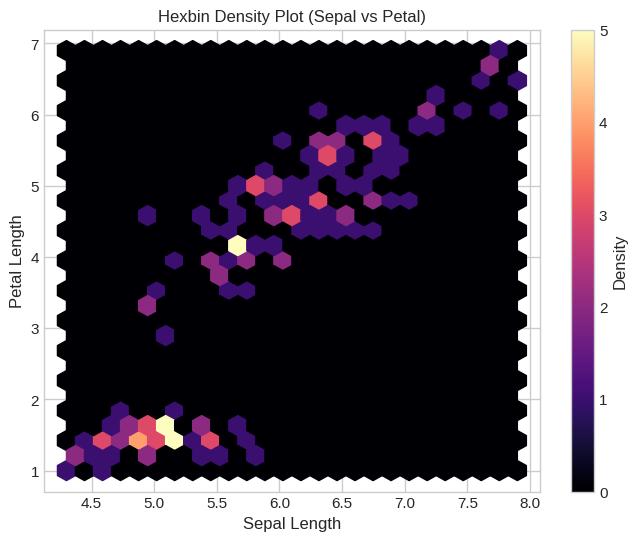

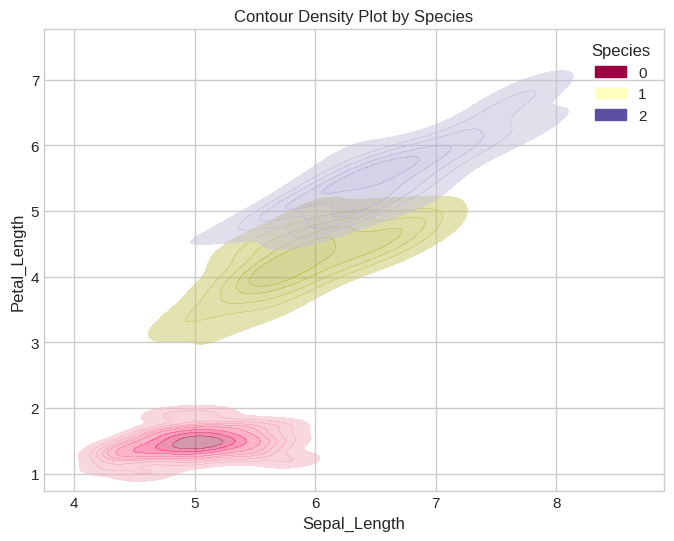

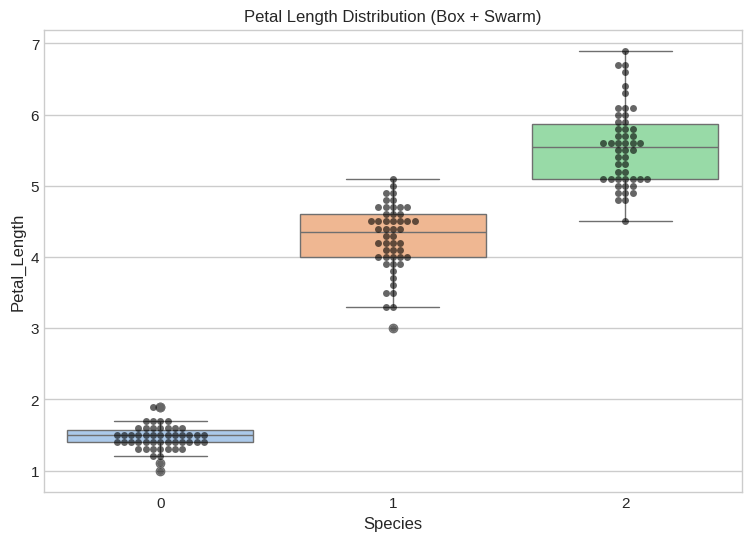

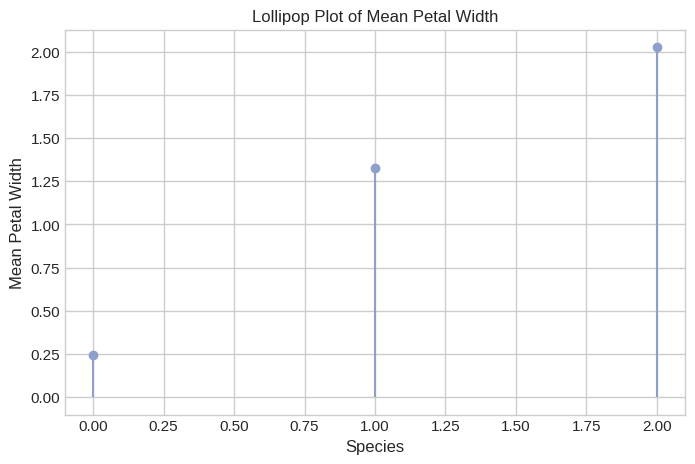

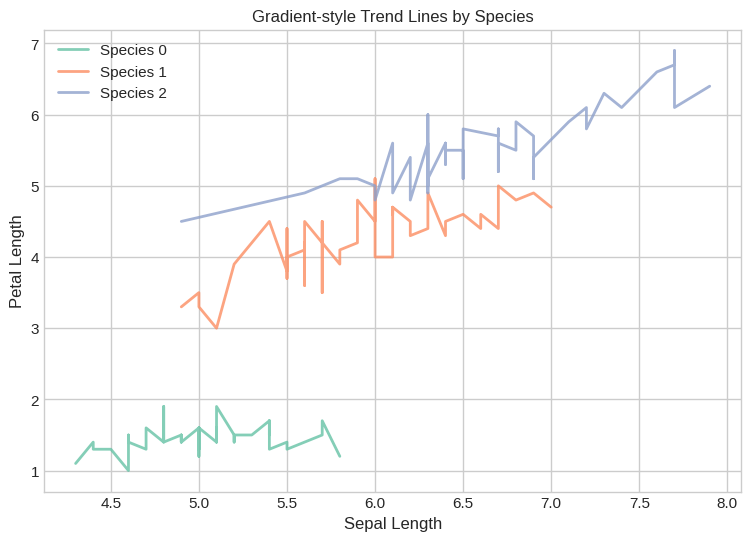

In [ ]:
# -----------------------------------------
# 14. Something Different – Creative & Rare Visuals
# -----------------------------------------

plt.style.use('seaborn-v0_8-whitegrid')

# 1. Hexbin Density Plot (Very Different Look)
plt.figure(figsize=(8, 6))
plt.hexbin(
    df['Sepal_Length'],
    df['Petal_Length'],
    gridsize=25,
    cmap='magma'
)
plt.colorbar(label="Density")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Hexbin Density Plot (Sepal vs Petal)")
plt.show()


# 2. Contour Density Plot (Smooth & Premium)
plt.figure(figsize=(8, 6))
sns.kdeplot(
    data=df,
    x="Sepal_Length",
    y="Petal_Length",
    hue="Species",
    fill=True,
    alpha=0.5,
    palette="Spectral"
)
plt.title("Contour Density Plot by Species")
plt.show()


# 3. Swarm + Box Combination (Stylish & Informative) – FIXED
plt.figure(figsize=(9, 6))

sns.boxplot(
    data=df,
    x="Species",
    y="Petal_Length",
    hue="Species",        # ✅ added
    palette="pastel",
    legend=False          # ✅ avoids duplicate legend
)

sns.swarmplot(
    data=df,
    x="Species",
    y="Petal_Length",
    color="black",
    alpha=0.6
)

plt.title("Petal Length Distribution (Box + Swarm)")
plt.show()


# 4. Lollipop Plot (Minimal & Elegant)
means = df.groupby("Species")["Petal_Width"].mean()

plt.figure(figsize=(8, 5))
plt.stem(
    means.index,
    means.values,
    basefmt=" ",
    linefmt="C2-",
    markerfmt="C2o"
)
plt.xlabel("Species")
plt.ylabel("Mean Petal Width")
plt.title("Lollipop Plot of Mean Petal Width")
plt.show()


# 5. Gradient Line Plot (Very Aesthetic)
plt.figure(figsize=(9, 6))

for species in df['Species'].unique():
    sorted_df = df[df['Species'] == species].sort_values("Sepal_Length")
    plt.plot(
        sorted_df["Sepal_Length"],
        sorted_df["Petal_Length"],
        linewidth=2,
        alpha=0.8,
        label=f"Species {species}"
    )

plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Gradient-style Trend Lines by Species")
plt.legend()
plt.show()
